# Wine Research project
In this practice project, I have done some work on the famous wine dataset from Kaggle. I have used this notebook primarily as a testing playgorund. You can check the different scores I received while testing with various different models at the bottom of this notebook. 

## Importing Libraries

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score,KFold,train_test_split,learning_curve,validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

## Loading Dataset

In [54]:
# Install dependencies first if not installed
# pip install kagglehub pandas

import kagglehub
import pandas as pd

# Download the dataset
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

# Load the CSV file (KaggleHub returns the dataset folder path)
df = pd.read_csv(f"{path}/WineQT.csv")  # The file name in that dataset is WineQT.csv


## Preprocessing

In [55]:
df.shape

(1143, 13)

In [56]:
df.isna().value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH     sulphates  alcohol  quality  Id   
False          False             False        False           False      False                False                 False    False  False      False    False    False    1143
Name: count, dtype: int64

No null rows were found. I also checked with data wrangler. df looks clean

In [57]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [58]:
df["quality"].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

Encoding the target classes. The following rule is applied :
- The Wine with a quality of **3** or **4** becomes Class **0**

- The Wine with a quality of **5** or **6** becomes Class **1**

- The Wine with a quality of **7** or **8** becomes Class **2**

In [59]:
def modifcation(x):
  if x in [3,4]:
    return 0
  elif x in [5,6]:
    return 1
  elif x in [7,8]:
    return 2

df["label_quality"] = df["quality"].apply(modifcation)
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,label_quality
1133,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7,1584,2
1134,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6,1586,1
1135,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6,1587,1
1136,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6,1590,1
1137,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,1591,1
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592,1
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,1
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,1
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,1
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597,1


Train Test Split

In [60]:
X = df.iloc[:,:-1].drop(["quality","Id"],axis=1)
names = X.columns
X = X.to_numpy()
y = df.iloc[:,-1].to_numpy()

x_train,x_test,y_train,y_test = train_test_split(
  X,y,test_size=1/3,stratify=y,random_state=91,shuffle=True)

## Pipeline Developmemnt

In [61]:
# RnadomForestClassifier
model = RandomForestClassifier(n_estimators=1000,random_state=101,class_weight="balanced",max_depth=13)
pca = PCA(n_components=None)


preprocessor = Pipeline([
  ("imputation",SimpleImputer(strategy="median")),
  ("scaling",StandardScaler())
])
pipe = Pipeline([
  ("preprocessing",preprocessor),
  ("pca",pca),
  ("model",model)
])

pipe.fit(x_train,y_train)

after_pca = pipe.named_steps["pca"]
try:
  components = after_pca.components_
  explained_var = after_pca.explained_variance_

  comp_df = pd.DataFrame(
    components, columns=names, 
    index=[f"PC{i+1}" for i in range(after_pca.n_components_)])
  
  def change(x):
    return x * np.sqrt(explained_var)
  loading_df = comp_df.copy()
  loading_df = loading_df.apply(change)
except Exception as e:
  print(f"Something went wrong: {e}")

In [62]:
# # # SVC 
# model = SVC(C=10**5,kernel="rbf",class_weight="balanced",random_state=21)
# pca = PCA(n_components=None)

# preprocessor = Pipeline([
#   ("imputation",SimpleImputer(strategy="median")),
#   ("scaling",StandardScaler())
# ])
# pipe = Pipeline([
#   ("preprocessing",preprocessor),
#   ("pca",pca),
#   ("model",model)
# ])

# pipe.fit(x_train,y_train)

# after_pca = pipe.named_steps["pca"]
# try:
#   components = after_pca.components_
#   explained_var = after_pca.explained_variance_

#   comp_df = pd.DataFrame(
#     components, columns=names, 
#     index=[f"PC{i+1}" for i in range(after_pca.n_components_)])
  
#   def change(x):
#     return x * np.sqrt(explained_var)
#   loading_df = comp_df.copy()
#   loading_df = loading_df.apply(change)
# except Exception as e:
#   print(f"Something went wrong: {e}")

In [63]:
# # KNeighborClassifier 
# model = KNeighborsClassifier(n_neighbors=10,metric="minkowski",p=2)
# pca = PCA(n_components=None)

# preprocessor = Pipeline([
#   ("imputation",SimpleImputer(strategy="median")),
#   ("scaling",StandardScaler())
# ])
# pipe = Pipeline([
#   ("preprocessing",preprocessor),
#   ("pca",pca),
#   ("model",model)
# ])

# pipe.fit(x_train,y_train)

# after_pca = pipe.named_steps["pca"]
# try:
#   components = after_pca.components_
#   explained_var = after_pca.explained_variance_

#   comp_df = pd.DataFrame(
#     components, columns=names, 
#     index=[f"PC{i+1}" for i in range(after_pca.n_components_)])
  
#   def change(x):
#     return x * np.sqrt(explained_var)
#   loading_df = comp_df.copy()
#   loading_df = loading_df.apply(change)
# except Exception as e:
#   print(f"Something went wrong: {e}")

In [64]:
# # LogisticRgeression 
# model = LogisticRegression(solver="lbfgs",penalty="l2",C=10**5,class_weight="balanced",random_state=213)
# pca = PCA(n_components=None)

# preprocessor = Pipeline([
#   ("imputation",SimpleImputer(strategy="median")),
#   ("scaling",StandardScaler())
# ])
# pipe = Pipeline([
#   ("preprocessing",preprocessor),
#   ("pca",pca),
#   ("model",model)
# ])

# pipe.fit(x_train,y_train)

# after_pca = pipe.named_steps["pca"]
# try:
#   components = after_pca.components_
#   explained_var = after_pca.explained_variance_

#   comp_df = pd.DataFrame(
#     components, columns=names, 
#     index=[f"PC{i+1}" for i in range(after_pca.n_components_)])
  
#   def change(x):
#     return x * np.sqrt(explained_var)
#   loading_df = comp_df.copy()
#   loading_df = loading_df.apply(change)
# except Exception as e:
#   print(f"Something went wrong: {e}")

### Plotting the Loading heatmap

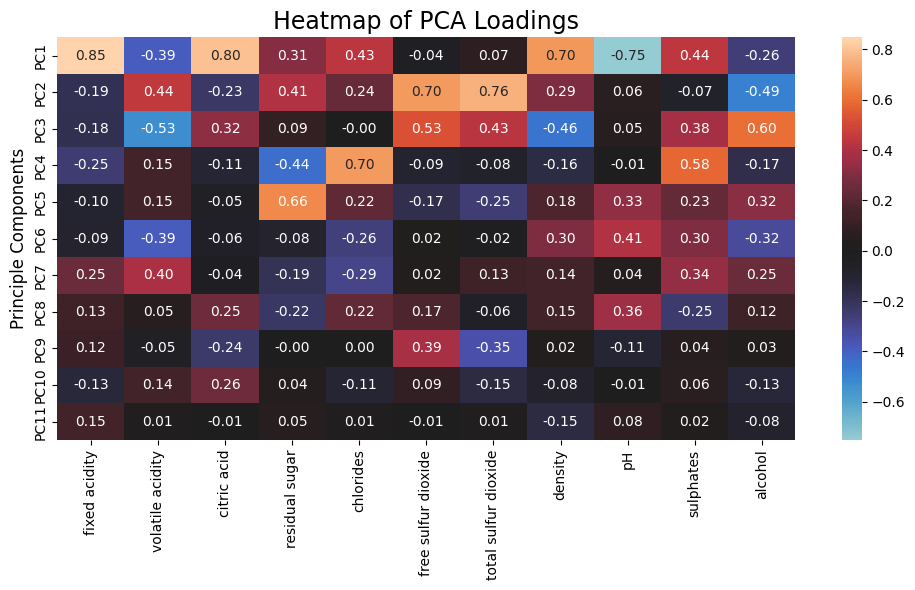

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(loading_df,cmap="icefire",annot=True,fmt=".2f",center=0)

plt.title("Heatmap of PCA Loadings",fontdict={"fontsize":17})
plt.tight_layout()
plt.ylabel("Principle Components",fontdict={"fontsize":12})
plt.tight_layout()
plt.show()

This PCA loadings heatmap reveals the correlation between the original wine features and the first eleven Principal Components (PCs). PC1 is mainly driven by fixed acidity (positive high loading, 0.85) and negatively related to pH (-0.75). Observing the loadings helps interpret what each dimension captures; for instance, PC3 strongly links to alcohol (0.60) and free sulfur dioxide (0.53). Overall, the colors indicate the magnitude and direction of each variable's influence on the new uncorrelated components.

If you want to try out one of these, comment out the previous one (currently RandomFC) and uncomment the new one.

## Evaluation

In [69]:
kfold = KFold(n_splits=10,shuffle=True,random_state=201)
score = cross_val_score(pipe,X,y,cv=kfold,n_jobs=-1)
print(score)
print(f"Average = {score.mean()}")         # Latest Run: Random FC

[0.89565217 0.86086957 0.88695652 0.92105263 0.86842105 0.89473684
 0.89473684 0.89473684 0.87719298 0.85964912]
Average = 0.8854004576659038


### Cross validation score comparison (4 folds, average score):

RandomForestClassifier 
=> 0.8731321310268678

SVC (with RBF kernal) 
=> 0.8110293215556373

Logistic Regression (lbfgs solver, l2 penalty, C = 10^5) 
=> 0.5616918169549748

KNeighborsClassifier 
=> 0.839032020610968

## Learning and Validation Curves

Let's plot the **Learning Curve** plot to understand whether the model is fit well or is underfitting/overfitting.

In [71]:
train_size,train_score,val_score = learning_curve(
  pipe,x_train,y_train,train_sizes=np.linspace(0.1,1.0,10),shuffle=True,cv=5,
  random_state=108,n_jobs=-1
)

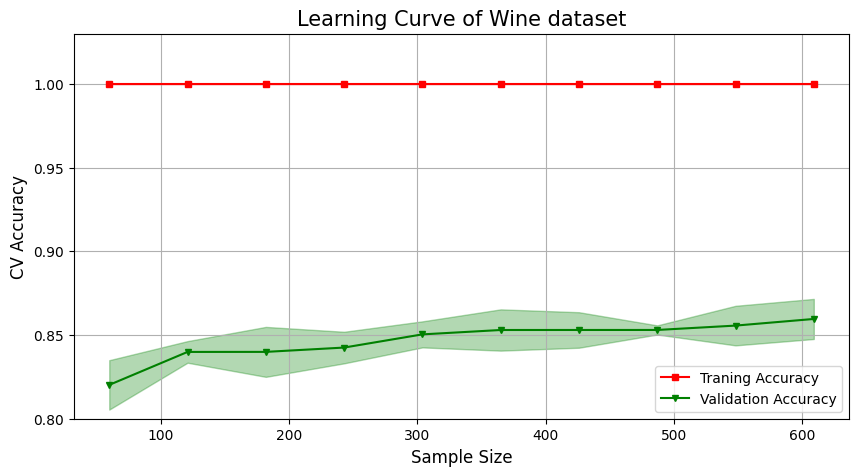

In [75]:
train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(val_score,axis=1)
test_std = np.std(val_score,axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_size,train_mean,marker="s",markersize=4,label="Traning Accuracy",color="red")
plt.fill_between(train_size, train_mean + train_std, train_mean-train_std,color="red",alpha=0.3)

plt.plot(train_size,test_mean,marker="v",markersize=4,label="Validation Accuracy",color="green")
plt.fill_between(train_size,test_mean + test_std,test_mean - test_std,color="green",alpha=0.3)

plt.title("Learning Curve of Wine dataset",fontdict={"fontsize":15})
plt.xlabel("Sample Size",fontdict={"fontsize":12})
plt.ylabel("CV Accuracy",fontdict={"fontsize":12})
plt.legend()
plt.grid()
plt.ylim(0.8,1.03)
plt.show()

From this plot, we can see that the **learning curve** for the model on the Wine dataset shows a **gap** between training and validation accuracy, suggesting **high variance** or **overfitting**. The Training Accuracy (red line) remains near perfect (1.00) across all sample sizes, indicating the model learns the training data exceptionally well. Conversely, the Validation Accuracy (green line) starts around 0.81 and improves gradually, leveling off around 0.85-0.86 with little benefit from increasing the sample size past 300. The shaded area around the validation accuracy shows the variance across cross-validation folds. 

Let's create the **validation curve** plot with Random Forest's `max_depth` parameter set as the parameter which we want to optimize.

In [78]:
train_acc, test_acc = validation_curve(
  model,x_train,y_train,param_name="max_depth",param_range=np.arange(0,21,2),cv=5,n_jobs=-1
)

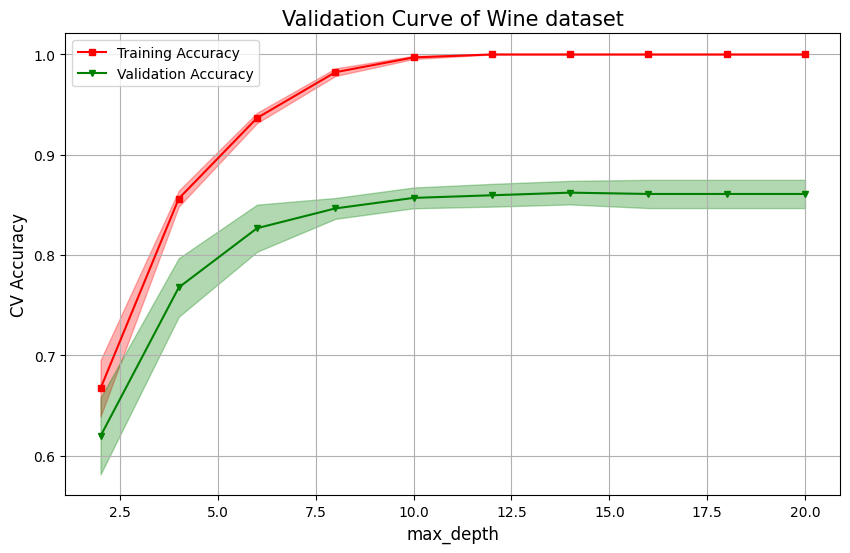

In [85]:
param_range = np.arange(0,21,2)
train_mean = np.mean(train_acc,axis=1)
train_std = np.std(train_acc,axis=1)
test_mean = np.mean(test_acc,axis=1)
test_std = np.std(test_acc,axis=1)

plt.figure(figsize=(10,6))
plt.plot(
  param_range,train_mean,marker="s",
  markersize=5,color="red",label="Training Accuracy"
)
plt.fill_between(
  param_range,train_mean + train_std, train_mean - train_std, alpha=0.3,color="red"
)

plt.plot(param_range,test_mean,marker="v",
        markersize=5,color="green",label="Validation Accuracy"
)

plt.fill_between(
  param_range,test_mean + test_std, test_mean - test_std, alpha= 0.3,color="green"               
)

plt.title("Validation Curve of Wine dataset",fontdict={"fontsize":15})
plt.xlabel("max_depth",fontdict={"fontsize":12})
plt.ylabel("CV Accuracy",fontdict={"fontsize":12})
plt.legend()
plt.grid()
plt.show()

From this plot, we can see that the **validation curve** for the model (based on the `max_depth` hyperparameter) reveals the effect of model complexity on accuracy. As the `max_depth` increases, the **Training Accuracy (red line)** rapidly improves and quickly plateaus at a perfect 1.00 around a depth of 10. The **Validation Accuracy (green line)** also improves but peaks and stabilizes around 0.86 for `max_depth` values between 10 and 20. This persistent gap between the two curves for higher depths is a clear sign of **overfitting**, where the model is too complex and learns the training data noise without generalizing well to new data. Therefore, the optimal max_depth for this model appears to be around **13**, as further increases offer no substantial gain in validation accuracy but increase the risk of overfitting. 

So, we go back to the pipeline and update the parameter tuninng.